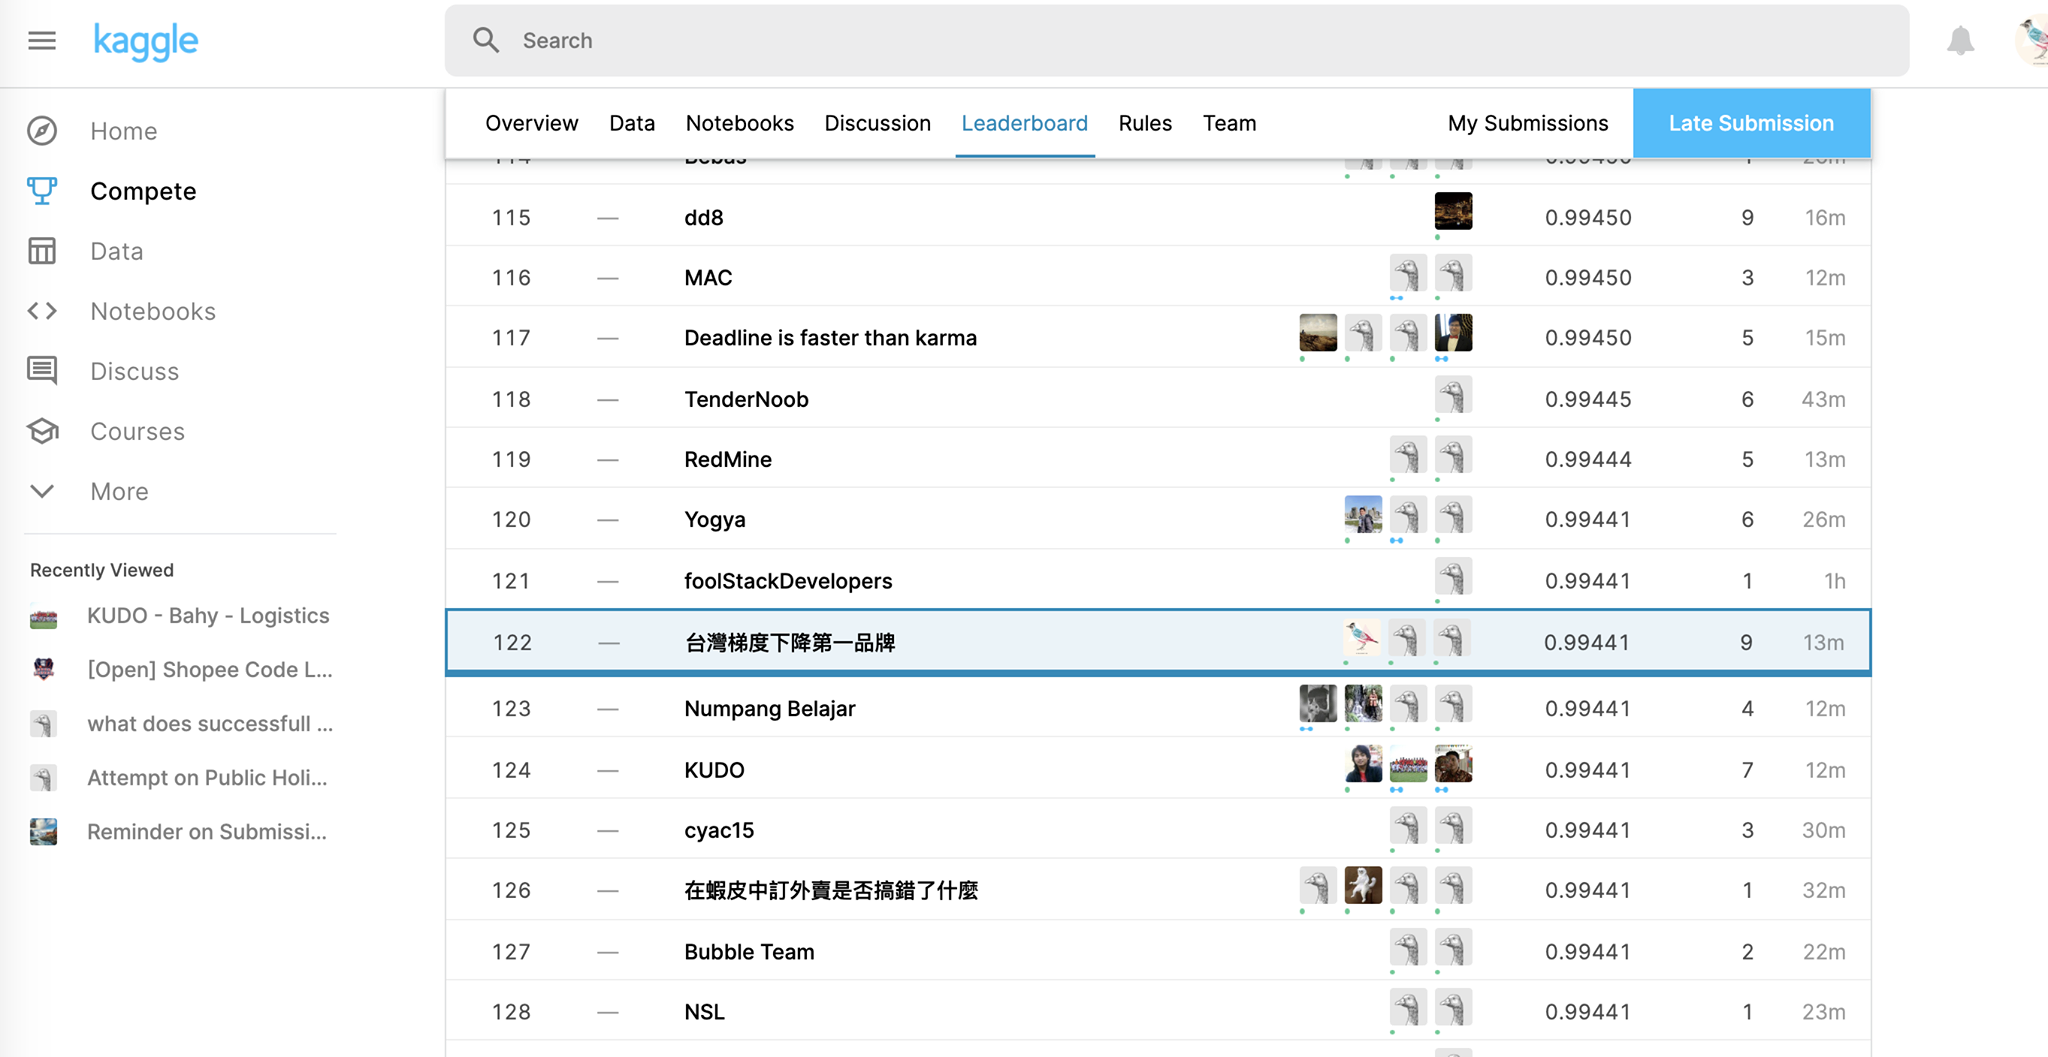

In [1]:
from IPython.display import Image
Image("SCL_5.png")

In [ ]:
%%time
id = 'XXXXXXXXXXXX'
!wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id} -O- \
| sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt && wget --content-disposition --load-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id}'&confirm='$(<confirm.txt)

--2020-07-11 07:01:40--  https://docs.google.com/uc?export=download&id=1q_qp28EhwMt9xMaMFG4AO3GGtMQhUiKn
Resolving docs.google.com (docs.google.com)... 108.177.97.113, 108.177.97.100, 108.177.97.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-07-11 07:01:40 (52.3 MB/s) - written to stdout [3246]

--2020-07-11 07:01:40--  https://docs.google.com/uc?export=download&id=1q_qp28EhwMt9xMaMFG4AO3GGtMQhUiKn&confirm=1PcY
Resolving docs.google.com (docs.google.com)... 108.177.125.113, 108.177.125.101, 108.177.125.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-28-docs.googleusercontent.com/docs/securesc/3jn8tn1l6lh4sgf16312p8sd6ttmt3hd/10rg5j

In [ ]:
%%time
!unzip /content/'Shopee.zip'

Archive:  /content/Shopee.zip
   creating: Shopee/
  inflating: __MACOSX/._Shopee       
  inflating: Shopee/delivery_orders_march.csv  
  inflating: __MACOSX/Shopee/._delivery_orders_march.csv  
  inflating: Shopee/SLA_matrix.xlsx  
  inflating: __MACOSX/Shopee/._SLA_matrix.xlsx  
CPU times: user 41.8 ms, sys: 4.29 ms, total: 46.1 ms
Wall time: 12.7 s


In [ ]:
import pandas as pd
data = pd.read_csv('delivery_orders_march.csv')

In [ ]:
#%% 
import pandas as pd
import numpy as np
# %%
ori_df = data

In [ ]:

#%%
ori_df['pick_datetime'] = pd.to_datetime(ori_df['pick'], unit='s')
ori_df['1st_deliver_attempt_datetime'] = pd.to_datetime(ori_df['1st_deliver_attempt'], unit='s')
ori_df['2nd_deliver_attempt_datetime'] = pd.to_datetime(ori_df['2nd_deliver_attempt'], unit='s')

In [ ]:
ori_df['2nd_deliver_attempt_datetime'][ori_df['2nd_deliver_attempt_datetime'].isna()] = pd.to_datetime('2200-12-31')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
busday_cnt_cond1 = np.busday_count(
    ori_df['pick_datetime'].values.astype('datetime64[D]'),
    ori_df['1st_deliver_attempt_datetime'].values.astype('datetime64[D]'),
    weekmask=[1,1,1,1,1,1,0],
    holidays = ['2020-03-08',
               '2020-03-25',
               '2020-03-30',
               '2020-03-31']
)

In [ ]:
busday_cnt_cond2 = np.busday_count(
    ori_df['1st_deliver_attempt_datetime'].values.astype('datetime64[D]'),
    ori_df['2nd_deliver_attempt_datetime'].values.astype('datetime64[D]'),
    weekmask=[1,1,1,1,1,1,0],
    holidays = ['2020-03-08',
               '2020-03-25',
               '2020-03-30',
               '2020-03-31']
)


In [ ]:
ori_df['busday_cnt_cond1'] = busday_cnt_cond1
ori_df['busday_cnt_cond2'] = busday_cnt_cond2

In [ ]:
ori_df['busday_cnt_cond2'] = np.where(ori_df['busday_cnt_cond2']>50000, 0, ori_df['busday_cnt_cond2'])

In [ ]:
buyeraddress_list=[]
buyer_list = list(ori_df['buyeraddress'].str.lower()) 

for i in buyer_list:
  if ('metro manila'in i ):buyeraddress_list.append('Metro Manila')
  elif ('luzon' in i  ):buyeraddress_list.append('Luzon')
  elif ('visayas' in i ):buyeraddress_list.append('Visayas')
  elif ('mindanao' in i):buyeraddress_list.append('Mindanao')

selleraddress_list=[]
seller_list = list(ori_df['selleraddress'].str.lower()) 

for i in seller_list:
  if ('metro manila'in i ):selleraddress_list.append('Metro Manila')
  elif ('luzon' in i  ):selleraddress_list.append('Luzon')
  elif ('visayas' in i ):selleraddress_list.append('Visayas')
  elif ('mindanao' in i):selleraddress_list.append('Mindanao')

In [ ]:
ori_df['buyeraddress_list'] = buyeraddress_list
ori_df['selleraddress_list'] = selleraddress_list

In [ ]:
%%time
id = 'XXXXXXXXXXXXXXX'
!wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id} -O- \
| sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt && wget --content-disposition --load-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id}'&confirm='$(<confirm.txt)

--2020-07-11 08:29:42--  https://docs.google.com/uc?export=download&id=1OSe86fwbuwo4yxOYS7E_HhO8dT-MfcJ5
Resolving docs.google.com (docs.google.com)... 108.177.125.102, 108.177.125.113, 108.177.125.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/em36kh4pva6m8b8mbp6gk94ueglufuhb/1594456125000/09818303002550235147/*/1OSe86fwbuwo4yxOYS7E_HhO8dT-MfcJ5?e=download [following]
--2020-07-11 08:29:43--  https://doc-14-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/em36kh4pva6m8b8mbp6gk94ueglufuhb/1594456125000/09818303002550235147/*/1OSe86fwbuwo4yxOYS7E_HhO8dT-MfcJ5?e=download
Resolving doc-14-0o-docs.googleusercontent.com (doc-14-0o-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-14-0o-docs.googleusercontent.com (doc-14

In [ ]:
data_melt = pd.read_csv('/content/SLA_matrix_MELT.csv')


In [ ]:
data_melt.columns = ['buyeraddress_list', 'selleraddress_list', 'workday', 'workday1']

In [ ]:
ori_df = ori_df.merge(data_melt, how = 'left', on = ['buyeraddress_list', 'selleraddress_list'])

In [ ]:
ori_df['label'] = np.where((ori_df['busday_cnt_cond1']<=ori_df['workday'])&
                           (ori_df['busday_cnt_cond2']<3), 0, 1)

In [ ]:
ori_df['is_late'] = ori_df['label'] 

In [ ]:
ori_df[['orderid','is_late']].to_csv('sub_ethan.csv', index = False)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nsysudagg","key":"14e4d3bf90370997f535c43846474631"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-07-06 18:49:31          87262  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          15264  
oleksastepaniuk/prozorro-public-procurement-dataset           ProZorro. Ukrainian public procurement dataset      448MB  2020-04-15 17:09:37             33  
navinmundhra/daily-power-generation-in-india-20172020         Daily Power Generation in India (2017-2020)          63KB  2020-06-29 17:13:29            328  
mrmorj/data-police-shootings                        

In [ ]:
!kaggle competitions submit -c open-shopee-code-league-logistic -f sub_ethan.csv -m "try"

100% 41.2M/41.2M [00:10<00:00, 4.15MB/s]
Successfully submitted to [Open] Shopee Code League - Logistics